## Week 6 Part 1

Use the level-sets method to implement constant motion. Consider simply an image as the embedding function and deform it according to the corresponding equation, It=|∇I|. Implement also It=−|∇I|. Observe the result of both cases for different evolution intervals. 

In [70]:
from __future__ import division, print_function

import numpy as np
from matplotlib import pyplot as plt
import time
import sys

import skimage
from skimage import img_as_float, img_as_ubyte
from skimage import io
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage import transform

%matplotlib inline

In [71]:
def plot_1xc(imgs_list, titles_list, save_file=None):
    cols = len(imgs_list)
    i = 0
    
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(15,15))
    for c in range(cols):
        axes[c].imshow(imgs_list[i], cmap="gray")
        axes[c].set_title(titles_list[i], size=20)
        axes[c].set_xticks([])
        axes[c].set_yticks([])
        i = i + 1
    plt.tight_layout();
    
    if not (save_file == None):
        filename = time.strftime("%Y%m%d_%H%M") + "_" + save_file + ".png"
        fig.savefig(filename, bbox_inches='tight')

In [72]:
def plot_rxc(imgs_list, titles_list, ncol=3, save_file=None):
    cols = ncol
    rows = np.ceil(len(imgs_list)/cols).astype(int)
    i = 0
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15*rows/cols))
    for r in range(rows):
        for c in range(cols):
            if i < len(imgs_list):
                axes[r,c].imshow(imgs_list[i], cmap="gray")
                axes[r,c].set_title(titles_list[i], size=20)
                axes[r,c].set_xticks([])
                axes[r,c].set_yticks([])
            i = i + 1
    plt.tight_layout();
    
    if not (save_file == None):
        filename = time.strftime("%Y%m%d_%H%M") + "_" + save_file + ".png"
        fig.savefig(filename, bbox_inches='tight')

In [73]:
O = io.imread("../images/circle.png")
O = img_as_float(O)
I = rgb2gray(O)


0.0 1.0 -1.0 1.0 -1.0 1.0 0.0 1.33328719643


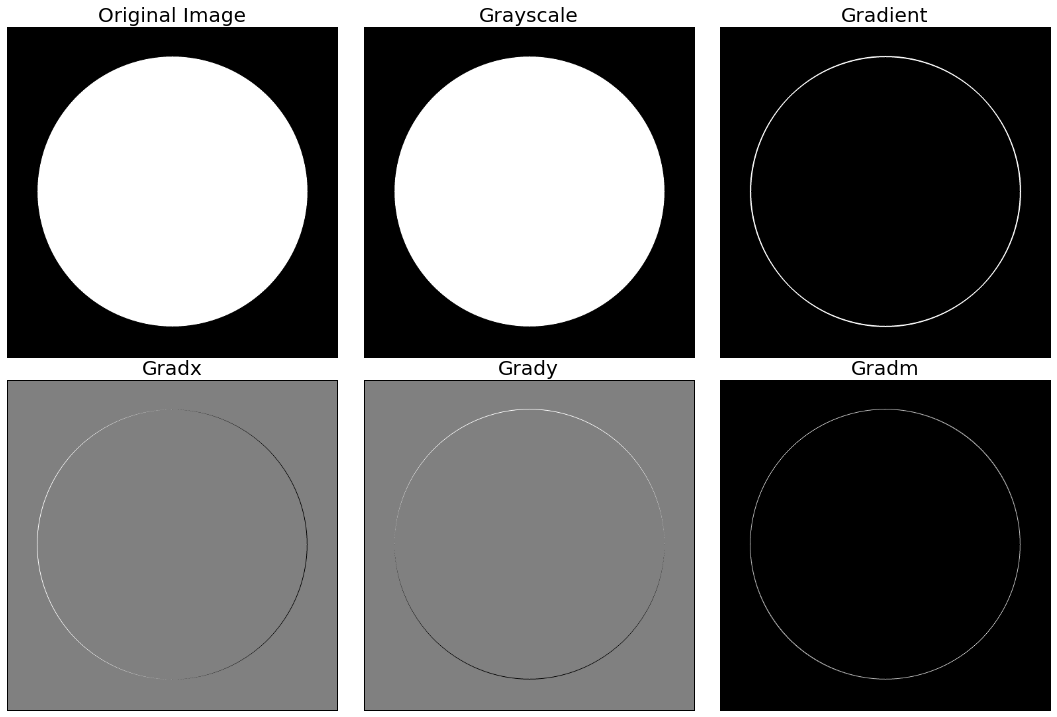

In [74]:
from skimage.filters.rank import gradient
# k = np.array([[0,1,0], [1,-2,0], [0,0,0]])
k = np.array([[0,1,0], [1,-4,1], [0,1,0]])
grad = img_as_float(gradient(I, k))

from scipy import ndimage
kx = np.array([[0,0,0], [1,-1,0], [0,0,0]])
ky = np.array([[0,1,0], [0,-1,0], [0,0,0]])
gradx = ndimage.convolve(I, kx)
grady = ndimage.convolve(I, ky)
gradm = np.sqrt(gradx**2 + grady**2)

print(np.min(grad), np.max(grad), np.min(gradx), np.max(gradx), 
      np.min(grady), np.max(grady), np.min(gradm), np.max(gradm))
plot_rxc([O,I,grad,gradx,grady,gradm], ["Original Image", "Grayscale", "Gradient", "Gradx", "Grady", "Gradm"])

In [75]:
int(20/6)

3

0
10
20
30
40


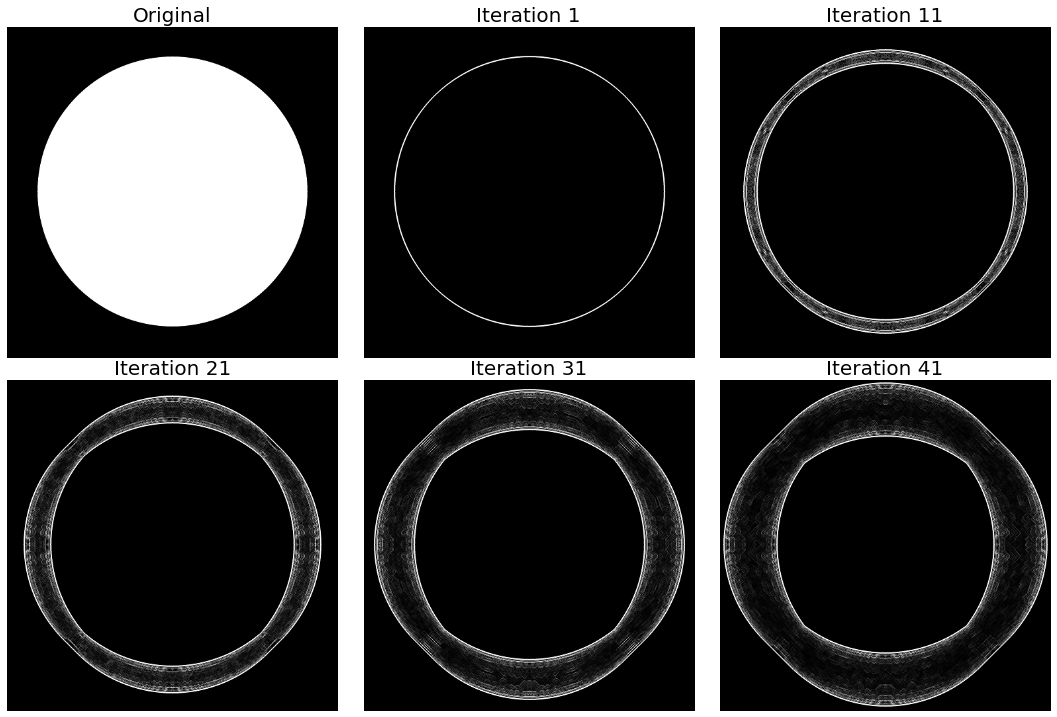

In [77]:
delta_t = 1
ims = []
ims.append(I)
titles = []
titles.append("Original")
# k = np.array([[0,1,0], [1,-2,0], [0,0,0]])
k = np.array([[0,1,0], [1,-4,1], [0,1,0]])

n = 50
n_keep = 5
keep_every = int(n/n_keep)

I_old = I.copy()

for t in range(n):
    G = img_as_float(gradient(I_old, k))
    # print(t, np.min(ims[t]), np.max(ims[t]), np.min(G), np.max(G))
    # I_new = I_old + delta_t * G
    # I_new = I_new/(np.max(I_new))
    I_new = delta_t * G
    if not t % keep_every:
        ims.append(I_new)
        titles.append("Iteration " + str(t+1))
        print(t)
    I_old = I_new

plot_rxc(ims, titles, save_file="iterations")